#import

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#Описание данных

In [8]:
df = pd.read_excel('data\Копия Absolut_MFTI_file.xlsx')
df.head()

,ID,brand,model,horsepower,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,1,Acura,MDX,290.0,NaN,NaN,NaN,NaN,3225000.0,3505200.0,3808200.0,4148000.0,4517400.0,NaN,NaN,NaN,NaN
1,2,Acura,MDX,290.0,NaN,NaN,NaN,NaN,3239500.0,3521000.0,3825500.0,4148000.0,4517400.0,NaN,NaN,NaN,NaN
2,3,Acura,MDX,290.0,NaN,NaN,2400700.0,2672500.0,2968300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Acura,MDX,290.0,NaN,NaN,2569800.0,2855600.0,3166200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Acura,RDX,277.0,NaN,NaN,2029300.0,2197200.0,2454400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Первичный анализ структуры данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17680 entries, 0 to 17679
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          17680 non-null  int64  
 1   brand       17680 non-null  object 
 2   model       17680 non-null  object 
 3   horsepower  17680 non-null  float64
 4   2012        753 non-null    float64
 5   2013        2088 non-null   float64
 6   2014        3308 non-null   float64
 7   2015        5326 non-null   float64
 8   2016        5233 non-null   float64
 9   2017        5577 non-null   float64
 10  2018        6632 non-null   float64
 11  2019        8122 non-null   float64
 12  2020        7999 non-null   float64
 13  2021        6459 non-null   float64
 14  2022        5006 non-null   float64
 15  2023        2287 non-null   float64
 16  2024        172 non-null    float64
dtypes: float64(14), int64(1), object(2)
memory usage: 2.3+ MB


In [10]:
# Определение типов данных
df.dtypes

ID              int64
brand          object
model          object
horsepower    float64
2012          float64
2013          float64
2014          float64
2015          float64
2016          float64
2017          float64
2018          float64
2019          float64
2020          float64
2021          float64
2022          float64
2023          float64
2024          float64
dtype: object

In [11]:
df.describe()

,ID,horsepower,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
count,17680.000000,17680.000000,7.530000e+02,2.088000e+03,3.308000e+03,5.326000e+03,5.233000e+03,5.577000e+03,6.632000e+03,8.122000e+03,7.999000e+03,6.459000e+03,5.006000e+03,2.287000e+03,1.720000e+02
mean,8840.500000,205.550592,1.791254e+06,2.296387e+06,2.398044e+06,2.510789e+06,2.238151e+06,2.608287e+06,2.850301e+06,3.497783e+06,4.089012e+06,4.925213e+06,5.403673e+06,6.150824e+06,3.741923e+06
std,5103.920715,110.557935,1.063943e+06,1.713524e+06,1.708317e+06,1.776952e+06,1.486346e+06,1.797427e+06,1.885158e+06,2.329353e+06,2.608699e+06,3.038085e+06,3.372315e+06,4.092549e+06,2.609750e+06
min,1.000000,11.000000,1.746000e+05,1.930000e+05,2.138000e+05,2.327000e+05,2.529000e+05,3.939000e+05,4.299000e+05,5.213000e+05,6.468000e+05,6.770000e+05,6.878000e+05,7.466000e+05,7.325000e+05
25%,4420.750000,130.000000,1.095400e+06,9.997500e+05,1.184150e+06,1.282800e+06,1.297300e+06,1.512700e+06,1.664475e+06,1.933075e+06,2.300650e+06,2.859050e+06,3.205725e+06,3.404600e+06,2.144900e+06
50%,8840.500000,163.000000,1.577100e+06,1.723000e+06,1.812900e+06,1.930400e+06,1.911000e+06,2.191000e+06,2.457650e+06,2.937200e+06,3.488200e+06,4.214900e+06,4.677400e+06,4.847400e+06,2.663500e+06
75%,13260.250000,249.000000,2.159300e+06,3.171650e+06,3.476225e+06,3.216850e+06,2.653600e+06,3.073700e+06,3.369725e+06,4.254450e+06,4.926550e+06,5.947550e+06,6.413025e+06,7.575150e+06,4.439000e+06
max,17680.000000,1000.000000,4.999000e+06,1.455200e+07,1.563760e+07,1.677780e+07,1.797530e+07,2.797070e+07,3.052620e+07,3.666470e+07,4.409470e+07,2.806100e+07,3.107670e+07,3.439050e+07,1.518800e+07


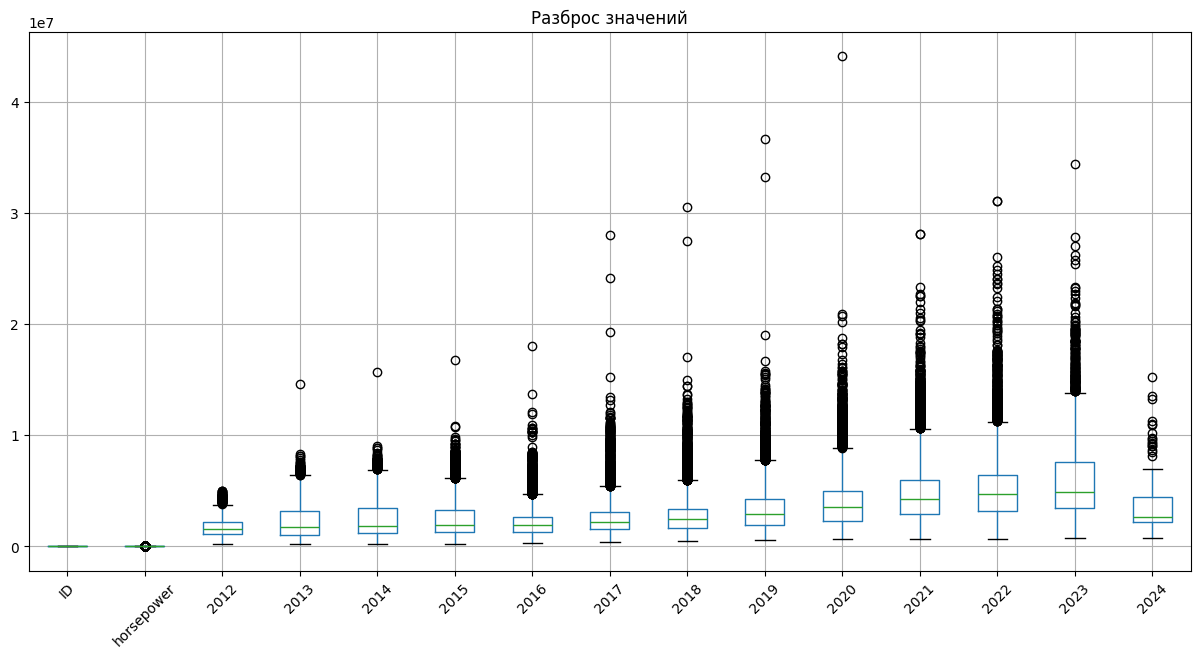

In [12]:
#Проверка на выбросы
# Выбор колонок для графика
numerical_cols = df.select_dtypes(include='number').columns

# График значений
plt.figure(figsize=(15, 7))
df[numerical_cols].boxplot()
plt.title('Разброс значений')
plt.xticks(rotation=45)
plt.show()

In [13]:
# Проверка максимальных значений
top_10_max_2020 = df.nlargest(10, '2020')

top_10_max_2020

,ID,brand,model,horsepower,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
16146,16147,Volkswagen,Crafter,140.0,NaN,NaN,NaN,NaN,NaN,24144400.0,27446000.0,36664700.0,44094700.0,NaN,NaN,NaN,NaN
12910,12911,Porsche,911,650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20886500.0,23338700.0,26044200.0,NaN,NaN
9486,9487,Mercedes-Benz,G-class,585.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18957600.0,20672900.0,22499400.0,24462500.0,26968200.0,NaN
12909,12910,Porsche,911,650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20153900.0,22539400.0,25172800.0,NaN,NaN
12912,12913,Porsche,911,580.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18759600.0,20338600.0,22092400.0,NaN,NaN
828,829,Bentley,Mulsanne,512.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15568600.0,18233900.0,20227800.0,22433500.0,NaN,NaN
10393,10394,Mercedes-Benz,GLS-class,558.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18204100.0,20980300.0,24055000.0,NaN,NaN
12911,12912,Porsche,911,580.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17934800.0,19442000.0,21118400.0,NaN,NaN
829,830,Bentley,Mulsanne,537.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15078000.0,17261000.0,19207700.0,21371000.0,NaN,NaN
9485,9486,Mercedes-Benz,G-class,422.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15498200.0,16727400.0,18248800.0,19887500.0,21783900.0,NaN


In [14]:
top_10_max_2019 = df.nlargest(10, '2012')
top_10_max_2019

,ID,brand,model,horsepower,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
9078,9079,Mercedes-Benz,Actros,456.0,4999000.0,5558200.0,6174400.0,6853200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9070,9071,Mercedes-Benz,Actros,435.0,4961600.0,5516600.0,6128100.0,6801900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9063,9064,Mercedes-Benz,Actros,408.0,4924100.0,5475000.0,6081900.0,6750600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9079,9080,Mercedes-Benz,Actros,456.0,4839900.0,5381300.0,5977800.0,6635100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9072,9073,Mercedes-Benz,Actros,435.0,4804000.0,5341400.0,5933500.0,6585900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
826,827,Bentley,Mulsanne,512.0,4788000.0,5781400.0,6683500.0,7711000.0,8880200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9065,9066,Mercedes-Benz,Actros,408.0,4768100.0,5301500.0,5889200.0,6536700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9024,9025,Mercedes-Benz,Actros,456.0,4700000.0,5195300.0,NaN,NaN,NaN,NaN,9406200.0,NaN,NaN,NaN,NaN,NaN,NaN
9018,9019,Mercedes-Benz,Actros,435.0,4666800.0,5158500.0,NaN,NaN,NaN,NaN,9346700.0,NaN,NaN,NaN,NaN,NaN,NaN
9011,9012,Mercedes-Benz,Actros,408.0,4633500.0,5121800.0,NaN,NaN,NaN,NaN,9287200.0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Цены Volkswagen Crafter с ID 16146 явно выброс, удалим с ним строку
# df = df[df['ID'] != 16146].reset_index(drop=True)

In [16]:
# Удаление аномалий, выявленных в процессе анализа
df = df[~df['model'].isin(['BRZ', '5308', 'Crafter', 'EQV'])].reset_index(drop=True)

In [17]:
# Определение стран брендов
unique_brands = df['brand'].unique()
unique_brands

array(['Acura', 'Alfa Romeo', 'Audi', 'BAIC', 'BAW', 'Bentley', 'BMW',
       'Brilliance', 'Buick', 'BYD', 'Cadillac', 'Changan', 'Chery',
       'CheryExeed', 'Chevrolet', 'Chrysler', 'Citroen', 'Daewoo', 'DAF',
       'Datsun', 'Dayun', 'De Tomaso', 'DFSK', 'Dodge', 'Dongfeng (DFM)',
       'DW Hower', 'Evolute', 'Exeed', 'FAW', 'Ferrari', 'Fiat', 'Ford',
       'Foton', 'GAC', 'Geely', 'Genesis', 'GMC', 'Great Wall', 'Haima',
       'Haval', 'Hawtai', 'HINO', 'Honda', 'Hyundai', 'Infiniti', 'JAC',
       'Jaguar', 'Jeep', 'Jetour', 'Kaiyi', 'Kia', 'Lada', 'Land Rover',
       'Lexus', 'Lifan', 'LiXiang', 'Luxgen', 'Maserati', 'Mazda',
       'Mercedes-Benz', 'Mini (BMW)', 'Mitsubishi',
       'Mitsubishi-Fuso / Fuso', 'Nissan', 'Opel', 'Peugeot', 'Polestar',
       'Porsche', 'Proton', 'RAM', 'Ravon', 'Renault', 'Shacman',
       'SITRAK', 'Skoda', 'Smart', 'SsangYong', 'Subaru', 'Suzuki',
       'Tatra', 'Tesla', 'Toyota', 'UAZ', 'Volkswagen', 'Volvo', 'Voyah',
       'Zotye', 'Мо

In [18]:
brands_to_country = {
    'Acura': 'Japan',
    'Alfa Romeo': 'Italy',
    'Audi': 'Germany',
    'BAIC': 'China',
    'BAW': 'China',
    'Bentley': 'UK',
    'BMW':'Germany',
    'Brilliance': 'China',
    'Buick': 'USA',
    'BYD': 'China',
    'Cadillac': 'USA',
    'Changan': 'China',
    'Chery': 'China',
    'CheryExeed': 'China',
    'Chevrolet': 'USA',
    'Chrysler': 'USA',
    'Citroen': 'France',
    'Daewoo': 'South Korea',
    'DAF': 'Netherlands',
    'Datsun': 'Japan',
    'Dayun': 'China',
    'De Tomaso': 'Italy',
    'DFSK': 'China',
    'Dodge': 'USA',
    'Dongfeng (DFM)': 'China',
    'DW Hower': 'China',
    'Evolute':'USA',
    'Exeed': 'China',
    'FAW': 'China',
    'Ferrari': 'Italy',
    'Fiat': 'Italy',
    'Ford': 'USA',
    'Foton': 'China',
    'GAC': 'China',
    'Geely': 'China',
    'Genesis': 'South Korea',
    'GMC': 'USA',
    'Great Wall': 'China',
    'Haima': 'China',
    'Haval': 'China',
    'Hawtai': 'China',
    'HINO': 'Japan',
    'Honda': 'Japan',
    'Hyundai': 'South Korea',
    'Infiniti': 'Japan',
    'JAC': 'China',
    'Jaguar': 'UK',
    'Jeep': 'USA',
    'Jetour': 'China',
    'Kaiyi': 'China',
    'Kia': 'South Korea',
    'Lada': 'Russia',
    'Land Rover': 'UK',
    'Lexus': 'Japan',
    'Lifan': 'China',
    'LiXiang': 'China',
    'Luxgen': 'Taiwan',
    'Maserati': 'Italy',
    'Mazda': 'Japan',
    'Mercedes-Benz': 'Germany',
    'Mini (BMW)': 'Germany',
    'Mitsubishi': 'Japan',
    'Mitsubishi-Fuso / Fuso': 'Japan',
    'Nissan': 'Japan',
    'Opel': 'Germany',
    'Peugeot': 'France', 'Polestar': 'Sweden',
    'Porsche': 'Germany',
    'Proton': 'Malaysia',
    'RAM': 'USA',
    'Ravon': 'Uzbekistan',
    'Renault': 'France',
    'Shacman': 'China',
    'SITRAK': 'China',
    'Skoda': 'Czech Republic',
    'Smart': 'Germany',
    'SsangYong': 'South Korea',
    'Subaru': 'Japan',
    'Suzuki': 'Japan',
    'Tatra': 'Czech Republic',
    'Tesla': 'USA',
    'Toyota': 'Japan',
    'UAZ': 'Russia',
    'Volkswagen': 'Germany', 'Volvo': 'Sweden',
    'Voyah': 'China',
    'Zotye': 'China',
    'Москвич': 'Russia',
    'Урал': 'Russia'
}

In [19]:
df['country'] = df['brand'].map(brands_to_country)

In [20]:
cols = list(df.columns)
hp_index = cols.index('ID') + 1
cols.insert(hp_index, cols.pop(cols.index('country')))
df = df[cols]

#Расчет базовой амортизации

In [21]:
def calculate_depreciation(row):
    base_depreciation = 0.1  # Базовая амортизация
    # Проверка на 2024 год выпуска
    if not pd.isna(row['2024']):
        base_depreciation = 0.15

    # Списки российских и китайских брендов
    russian_brands = ['Lada', 'Москвич', 'Урал', 'UAZ']
    chinese_brands = [
        'BAIC', 'BAW', 'BYD', 'Changan', 'Chery', 'CheryExeed', 'DFSK',
        'Dongfeng (DFM)', 'FAW', 'Foton', 'Geely', 'Great Wall', 'Haima',
        'Haval', 'Hawtai', 'JAC', 'Jetour', 'Kaiyi', 'LiXiang', 'Lifan',
        'Luxgen', 'Voyah', 'Zotye'
    ]

    # Учет внешних факторов
    if row['brand'] not in russian_brands or chinese_brands:
        base_depreciation -= 0.05

    # Учет мощности двигателя
    horsepower = row['horsepower']
    additional_depreciation = 0
    if horsepower > 199:
        additional_depreciation = ((horsepower - 199) // 50 + 1) * 0.025

    total_depreciation = base_depreciation + additional_depreciation
    return total_depreciation


df['depreciation'] = df.apply(calculate_depreciation, axis=1)
# Переместим столбец depreciation после столбца horsepower
cols = list(df.columns)
hp_index = cols.index('horsepower') + 1
cols.insert(hp_index, cols.pop(cols.index('depreciation')))
df = df[cols]
df_with_nans = df.copy()
df_trend = df.copy()
df_lg = df.copy()
df_depreciation = df.copy()
df.head()


,ID,country,brand,model,horsepower,depreciation,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,1,Japan,Acura,MDX,290.0,0.1,NaN,NaN,NaN,NaN,3225000.0,3505200.0,3808200.0,4148000.0,4517400.0,NaN,NaN,NaN,NaN
1,2,Japan,Acura,MDX,290.0,0.1,NaN,NaN,NaN,NaN,3239500.0,3521000.0,3825500.0,4148000.0,4517400.0,NaN,NaN,NaN,NaN
2,3,Japan,Acura,MDX,290.0,0.1,NaN,NaN,2400700.0,2672500.0,2968300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Japan,Acura,MDX,290.0,0.1,NaN,NaN,2569800.0,2855600.0,3166200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Japan,Acura,RDX,277.0,0.1,NaN,NaN,2029300.0,2197200.0,2454400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Обработка пропусков по заданному тренду (от трех значений амортизации)

In [22]:
#Заполнение пропусков заданным трендом, там, где больше 4 значений, с помощью линейной регрессии
def missing_values_with_trend(data):
    for index, row in data.iterrows():
        # Значения цен (годы 2012-2024)
        values = row[-13:]
        years = np.array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

        # Приведение всех значений к числовому формату
        values = pd.to_numeric(values, errors='coerce')

        # Удаляем значения NaN и проверяем, что у нас как минимум 4 ненулевых значения
        non_nan_values = values.dropna()
        if len(non_nan_values) >= 4:
            # Получаем соответствующие годы для ненулевых значений
            non_nan_years = years[~values.isna()]

            # Преобразуем значения в логарифмическую шкалу
            log_values = np.log(non_nan_values)

            # Выполняем линейную регрессию на логарифмических значениях для нахождения тренда
            coef = np.polyfit(non_nan_years, log_values, 1)
            log_trend = np.poly1d(coef)

            # Заполняем отсутствующие значения с использованием экспоненты логарифмического тренда
            for i in range(len(values)):
                if np.isnan(values.iloc[i]):
                    values.iloc[i] = np.exp(log_trend(years[i]))

            values = values.round(0)

            # Обновляем строку в датафрейме
            data.loc[index, values.index] = values

    return data

df_trend = missing_values_with_trend(df_trend)

df_trend.head()

,ID,country,brand,model,horsepower,depreciation,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,1,Japan,Acura,MDX,290.0,0.1,2300550.0,2502742.0,2722704.0,2961998.0,3225000.0,3505200.0,3808200.0,4148000.0,4517400.0,4910107.0,5341649.0,5811118.0,6321848.0
1,2,Japan,Acura,MDX,290.0,0.1,2325496.0,2526475.0,2744823.0,2982042.0,3239500.0,3521000.0,3825500.0,4148000.0,4517400.0,4903544.0,5327328.0,5787738.0,6287937.0
2,3,Japan,Acura,MDX,290.0,0.1,NaN,NaN,2400700.0,2672500.0,2968300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Japan,Acura,MDX,290.0,0.1,NaN,NaN,2569800.0,2855600.0,3166200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Japan,Acura,RDX,277.0,0.1,NaN,NaN,2029300.0,2197200.0,2454400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Обработка всех пропусков с помощью линейной регрессии

In [ ]:
#Заполнение пропусков заданным трендом, там, где больше 2 значений, с помощью линейной регрессии
def missing_values_with_lg(data):
    for index, row in data.iterrows():
        # Значения цен (годы 2012-2024)
        values = row[-13:]
        years = np.array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

        # Приведение всех значений к числовому формату
        values = pd.to_numeric(values, errors='coerce')

        # Удаляем значения NaN и проверяем, что у нас как минимум 4 ненулевых значения
        non_nan_values = values.dropna()
        if len(non_nan_values) >= 2:
            # Получаем соответствующие годы для ненулевых значений
            non_nan_years = years[~values.isna()]

            # Преобразуем значения в логарифмическую шкалу
            log_values = np.log(non_nan_values)

            # Выполняем линейную регрессию на логарифмических значениях для нахождения тренда
            coef = np.polyfit(non_nan_years, log_values, 1)
            log_trend = np.poly1d(coef)

            # Заполняем отсутствующие значения с использованием экспоненты логарифмического тренда
            for i in range(len(values)):
                if np.isnan(values.iloc[i]):
                    values.iloc[i] = np.exp(log_trend(years[i]))

            values = values.round(0)

            # Обновляем строку в датафрейме
            data.loc[index, values.index] = values

    return data

df_lg = missing_values_with_lg(df_lg)

df_lg.head()

,ID,country,brand,model,horsepower,depreciation,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,1,Japan,Acura,MDX,290.0,0.1,2300550.0,2502742.0,2722704.0,2961998.0,3225000.0,3505200.0,3808200.0,4148000.0,4517400.0,4910107.0,5341649.0,5811118.0,6321848.0
1,2,Japan,Acura,MDX,290.0,0.1,2325496.0,2526475.0,2744823.0,2982042.0,3239500.0,3521000.0,3825500.0,4148000.0,4517400.0,4903544.0,5327328.0,5787738.0,6287937.0
2,3,Japan,Acura,MDX,290.0,0.1,1942374.0,2159822.0,2400700.0,2672500.0,2968300.0,3301853.0,3671493.0,4082513.0,4539547.0,5047746.0,5612837.0,6241190.0,6939886.0
3,4,Japan,Acura,MDX,290.0,0.1,2086507.0,2316004.0,2569800.0,2855600.0,3166200.0,3515745.0,3902446.0,4331680.0,4808127.0,5336978.0,5923998.0,6575585.0,7298842.0
4,5,Japan,Acura,RDX,277.0,0.1,1669123.0,1835642.0,2029300.0,2197200.0,2454400.0,2685259.0,2953151.0,3247770.0,3571781.0,3928116.0,4320001.0,4750982.0,5224960.0


#Обработка пропусков по рассчитанной амортизации и тренду

In [ ]:
def missing_prices_with_depreciation(data):
    # Определение столбцов, которые являются годами
    year_columns = [col for col in data.columns if col.isdigit()]

    # Итерация по каждой строке в данных
    for index, row in data.iterrows():
        values = row[-13:]
        non_nan_values = values.dropna()
        # Проверка, если меньше 4 известных значений в последних 12 годах
        if len(non_nan_values) < 4:
            # Итерация по каждому годовому столбцу для заполнения отсутствующих значений
            for i, year in enumerate(year_columns):
                if pd.isnull(row[year]):
                    # Поиск ближайшей предыдущей известной цены
                    prev_price, prev_year = None, None
                    for j in range(i - 1, -1, -1):
                        if pd.notnull(row[year_columns[j]]):
                            prev_price = row[year_columns[j]]
                            prev_year = int(year_columns[j])
                            break

                    # Поиск ближайшей следующей известной цены
                    next_price, next_year = None, None
                    for j in range(i + 1, len(year_columns)):
                        if pd.notnull(row[year_columns[j]]):
                            next_price = row[year_columns[j]]
                            next_year = int(year_columns[j])
                            break

                    # Использование ближайшей известной цены для расчета
                    if prev_price is not None and next_price is not None:
                        # Использование ближайшего года (по времени)
                        if (int(year) - prev_year) <= (next_year - int(year)):
                            data.at[index, year] = round(prev_price * ((1 + row['depreciation']) ** (int(year) - prev_year)), 0)
                        else:
                            data.at[index, year] = round(next_price * ((1 - row['depreciation']) ** (next_year - int(year))), 0)
                    elif prev_price is not None:
                        data.at[index, year] = round(prev_price * ((1 + row['depreciation']) ** (int(year) - prev_year)), 0)
                    elif next_price is not None:
                        data.at[index, year] = round(next_price * ((1 - row['depreciation']) ** (next_year - int(year))), 0)
    return data

# Заполнение данных с учетом амортизации
df_depreciation = df_trend.copy()
df_depreciation = missing_prices_with_depreciation(df_depreciation)

df_depreciation.head()

,ID,country,brand,model,horsepower,depreciation,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,1,Japan,Acura,MDX,290.0,0.1,2300550.0,2502742.0,2722704.0,2961998.0,3225000.0,3505200.0,3808200.0,4148000.0,4517400.0,4910107.0,5341649.0,5811118.0,6321848.0
1,2,Japan,Acura,MDX,290.0,0.1,2325496.0,2526475.0,2744823.0,2982042.0,3239500.0,3521000.0,3825500.0,4148000.0,4517400.0,4903544.0,5327328.0,5787738.0,6287937.0
2,3,Japan,Acura,MDX,290.0,0.1,1944567.0,2160630.0,2400700.0,2672500.0,2968300.0,3265130.0,3591643.0,3950807.0,4345888.0,4780477.0,5258525.0,5784377.0,6362815.0
3,4,Japan,Acura,MDX,290.0,0.1,2081538.0,2312820.0,2569800.0,2855600.0,3166200.0,3482820.0,3831102.0,4214212.0,4635633.0,5099197.0,5609116.0,6170028.0,6787031.0
4,5,Japan,Acura,RDX,277.0,0.1,1643733.0,1826370.0,2029300.0,2197200.0,2454400.0,2699840.0,2969824.0,3266806.0,3593487.0,3952836.0,4348119.0,4782931.0,5261224.0


# Оценка влияния факторов на относительное изменение цен

In [ ]:
# Относительные изменения цен для каждого года
price_columns = df_lg.columns[6:]

# Процентное изменение для каждого года по сравнению с предыдущим годом
relative_changes = df_lg[price_columns].pct_change(axis=1)

# Удаляем первый столбец (2012), так как он будет содержать NaN после pct_change
relative_changes = relative_changes.iloc[:, 1:]

relative_changes = pd.concat([df_lg[['ID', 'brand', 'model', 'horsepower', 'depreciation']], relative_changes], axis=1)

# Calculate the average value from 2012 to 2024 for each row and store it in a new column 'average_depreciation'
relative_changes['average_depreciation'] = relative_changes.loc[:, '2013':'2024'].mean(axis=1)

relative_changes.head()

,ID,brand,model,horsepower,depreciation,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,average_depreciation
0,1,Acura,MDX,290.0,0.1,0.087889,0.087888,0.087888,0.088792,0.086884,0.086443,0.089229,0.089055,0.086932,0.087889,0.087888,0.087888,0.087889
1,2,Acura,MDX,290.0,0.1,0.086424,0.086424,0.086424,0.086336,0.086896,0.086481,0.084303,0.089055,0.085479,0.086424,0.086424,0.086424,0.086425
2,3,Acura,MDX,290.0,0.1,0.111950,0.111527,0.113217,0.110683,0.112372,0.111949,0.111949,0.111949,0.111949,0.111949,0.111949,0.111949,0.111949
3,4,Acura,MDX,290.0,0.1,0.109991,0.109584,0.111215,0.108769,0.110399,0.109991,0.109991,0.109991,0.109991,0.109991,0.109991,0.109991,0.109991
4,5,Acura,RDX,277.0,0.1,0.099764,0.105499,0.082738,0.117058,0.094059,0.099764,0.099764,0.099764,0.099764,0.099764,0.099764,0.099764,0.099789


In [ ]:
# Кодирование категориальной переменной 'model'
encoder = OneHotEncoder(drop='first')
model_encoded = encoder.fit_transform(relative_changes[['model']]).toarray()

# DataFrame для закодированных переменных модели
model_encoded_df = pd.DataFrame(model_encoded, columns=encoder.get_feature_names_out(['model']))

# Объединение закодированных переменных модели с оригинальным DataFrame
relative_changes_encoded = pd.concat([relative_changes.drop(['model'], axis=1), model_encoded_df], axis=1)

# Подготовка данных для регрессии
X = relative_changes_encoded.drop(columns=['ID', 'brand', 'depreciation', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', 'average_depreciation'])
y = relative_changes_encoded['average_depreciation']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказания и среднеквадратичная ошибка
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients, mse

(                Feature  Coefficient
 0            horsepower     0.000018
 1            model_1500     0.043085
 2    model_1500 Classic     0.050751
 3             model_1er     0.002024
 4               model_2     0.012107
 ..                  ...          ...
 695         model_mi-DO    -0.022999
 696         model_on-DO     0.018360
 697      model_pro Ceed    -0.004566
 698   model_pro Ceed GT     0.001372
 699          model_xRay     0.017695
 
 [700 rows x 2 columns],
 1301747580852508.5)

In [ ]:
# Коэффициенты для мощности двигателя и признаков модели
horsepower_coefficient = model.coef_[X.columns.get_loc('horsepower')]

# Коэффициенты для признаков модели
model_coefficients = {feature: coef for feature, coef in zip(X.columns, model.coef_) if feature.startswith('model_')}

# DataFrame для отображения коэффициентов для каждой строки в исходном наборе данных
coefficients_df = relative_changes[['ID', 'horsepower']].copy()
coefficients_df['horsepower_coefficient'] = horsepower_coefficient
coefficients_df['horsepower_effect'] = coefficients_df['horsepower'] * horsepower_coefficient

# Соотнесение коэффициентов модели с каждой строкой, создание словаря эффектов модели
model_effects = {model_name: (relative_changes_encoded[model_name] == 1).astype(int) * coef for model_name, coef in model_coefficients.items()}

# Преобразование словаря эффектов модели в DataFrame и объединение его с coefficients_df
model_effects_df = pd.concat(model_effects, axis=1)
coefficients_df = pd.concat([coefficients_df, model_effects_df], axis=1)

# Общий эффект модели для каждой строки
coefficients_df['model_effect'] = model_effects_df.sum(axis=1)

# Соответствующие столбцы для окончательного вывода
final_coefficients_df = coefficients_df[['ID', 'horsepower', 'horsepower_effect', 'model_effect']]

final_coefficients_df.head()

,ID,horsepower,horsepower_effect,model_effect
0,1,290.0,0.005237,0.015948
1,2,290.0,0.005237,0.015948
2,3,290.0,0.005237,0.015948
3,4,290.0,0.005237,0.015948
4,5,277.0,0.005002,-0.001568


In [ ]:
# Добавление рассчитанных коэффициентов в DataFrame с базовой амортизацией
data_with_coefficients = df_depreciation.copy()

data_with_coefficients = pd.merge(data_with_coefficients, final_coefficients_df[['ID', 'model_effect']], on='ID')

cols = list(data_with_coefficients.columns)
hp_index = cols.index('model') + 1
cols.insert(hp_index, cols.pop(cols.index('model_effect')))
data_with_coefficients = data_with_coefficients[cols]

data_with_coefficients.head()

,ID,country,brand,model,model_effect,horsepower,depreciation,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,1,Japan,Acura,MDX,0.015948,290.0,0.1,2300550.0,2502742.0,2722704.0,2961998.0,3225000.0,3505200.0,3808200.0,4148000.0,4517400.0,4910107.0,5341649.0,5811118.0,6321848.0
1,2,Japan,Acura,MDX,0.015948,290.0,0.1,2325496.0,2526475.0,2744823.0,2982042.0,3239500.0,3521000.0,3825500.0,4148000.0,4517400.0,4903544.0,5327328.0,5787738.0,6287937.0
2,3,Japan,Acura,MDX,0.015948,290.0,0.1,1944567.0,2160630.0,2400700.0,2672500.0,2968300.0,3265130.0,3591643.0,3950807.0,4345888.0,4780477.0,5258525.0,5784377.0,6362815.0
3,4,Japan,Acura,MDX,0.015948,290.0,0.1,2081538.0,2312820.0,2569800.0,2855600.0,3166200.0,3482820.0,3831102.0,4214212.0,4635633.0,5099197.0,5609116.0,6170028.0,6787031.0
4,5,Japan,Acura,RDX,-0.001568,277.0,0.1,1643733.0,1826370.0,2029300.0,2197200.0,2454400.0,2699840.0,2969824.0,3266806.0,3593487.0,3952836.0,4348119.0,4782931.0,5261224.0


# Уточнение амортизации

In [ ]:
# Кодирование категориальных переменных
label_encoder_brand = LabelEncoder()
label_encoder_model = LabelEncoder()
label_encoder_country = LabelEncoder()

data_with_coefficients['brand_encoded'] = label_encoder_brand.fit_transform(data_with_coefficients['brand'])
data_with_coefficients['model_encoded'] = label_encoder_model.fit_transform(data_with_coefficients['model'])
data_with_coefficients['country_encoded'] = label_encoder_country.fit_transform(data_with_coefficients['country'])

# Рассчет относительные изменения цен
for year in range(2012, 2024):
    next_year = str(year + 1)
    current_year = str(year)
    data_with_coefficients[f'relative_change_{next_year}'] = (data_with_coefficients[next_year] - data_with_coefficients[current_year]) / data_with_coefficients[current_year]

# Выбор признаков
features = ['country_encoded', 'brand_encoded', 'model_encoded', 'model_effect', 'horsepower'] + [f'relative_change_{year}' for year in range(2013, 2024)]
X = data_with_coefficients[features]
y = data_with_coefficients['depreciation']

# Разделение данных на обучающие и тестовые наборы.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

rmse

0.002294358724724191

In [ ]:
# Прогнозирование амортизации для каждой строки исходного набора данных
data_with_coefficients['predicted_depreciation'] = model.predict(X)

data_with_coefficients[['ID', 'brand', 'model', 'depreciation', 'predicted_depreciation']].head()

,ID,brand,model,depreciation,predicted_depreciation
0,1,Acura,MDX,0.1,0.1
1,2,Acura,MDX,0.1,0.1
2,3,Acura,MDX,0.1,0.1
3,4,Acura,MDX,0.1,0.1
4,5,Acura,RDX,0.1,0.1


In [ ]:
data_with_coefficients.head()

,ID,country,brand,model,model_effect,horsepower,depreciation,2012,2013,2014,...,relative_change_2016,relative_change_2017,relative_change_2018,relative_change_2019,relative_change_2020,relative_change_2021,relative_change_2022,relative_change_2023,relative_change_2024,predicted_depreciation
0,1,Japan,Acura,MDX,0.015948,290.0,0.1,2300550.0,2502742.0,2722704.0,...,0.088792,0.086884,0.086443,0.089229,0.089055,0.086932,0.087889,0.087888,0.087888,0.1
1,2,Japan,Acura,MDX,0.015948,290.0,0.1,2325496.0,2526475.0,2744823.0,...,0.086336,0.086896,0.086481,0.084303,0.089055,0.085479,0.086424,0.086424,0.086424,0.1
2,3,Japan,Acura,MDX,0.015948,290.0,0.1,1944567.0,2160630.0,2400700.0,...,0.110683,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.1
3,4,Japan,Acura,MDX,0.015948,290.0,0.1,2081538.0,2312820.0,2569800.0,...,0.108769,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.1
4,5,Japan,Acura,RDX,-0.001568,277.0,0.1,1643733.0,1826370.0,2029300.0,...,0.117058,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.1


In [ ]:
predicted_df = data_with_coefficients[['ID', 'predicted_depreciation', 'model_effect']]
merged_df = df_trend.merge(predicted_df, on='ID')
cols = list(merged_df.columns)
effect_index = cols.index('depreciation')
depreciation_index = cols.index('depreciation')
cols.insert(depreciation_index + 1, cols.pop(cols.index('predicted_depreciation')))
cols.insert(effect_index + 1, cols.pop(cols.index('model_effect')))
merged_df = merged_df[cols]
merged_df.head()

,ID,country,brand,model,horsepower,depreciation,model_effect,predicted_depreciation,2012,2013,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,1,Japan,Acura,MDX,290.0,0.1,0.015948,0.1,2300550.0,2502742.0,...,2961998.0,3225000.0,3505200.0,3808200.0,4148000.0,4517400.0,4910107.0,5341649.0,5811118.0,6321848.0
1,2,Japan,Acura,MDX,290.0,0.1,0.015948,0.1,2325496.0,2526475.0,...,2982042.0,3239500.0,3521000.0,3825500.0,4148000.0,4517400.0,4903544.0,5327328.0,5787738.0,6287937.0
2,3,Japan,Acura,MDX,290.0,0.1,0.015948,0.1,NaN,NaN,...,2672500.0,2968300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Japan,Acura,MDX,290.0,0.1,0.015948,0.1,NaN,NaN,...,2855600.0,3166200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Japan,Acura,RDX,277.0,0.1,-0.001568,0.1,NaN,NaN,...,2197200.0,2454400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Замена 'depreciation' на 'predicted_depreciation'
merged_df['depreciation'] = merged_df['predicted_depreciation']

merged_df.drop(columns=['predicted_depreciation'], inplace=True)

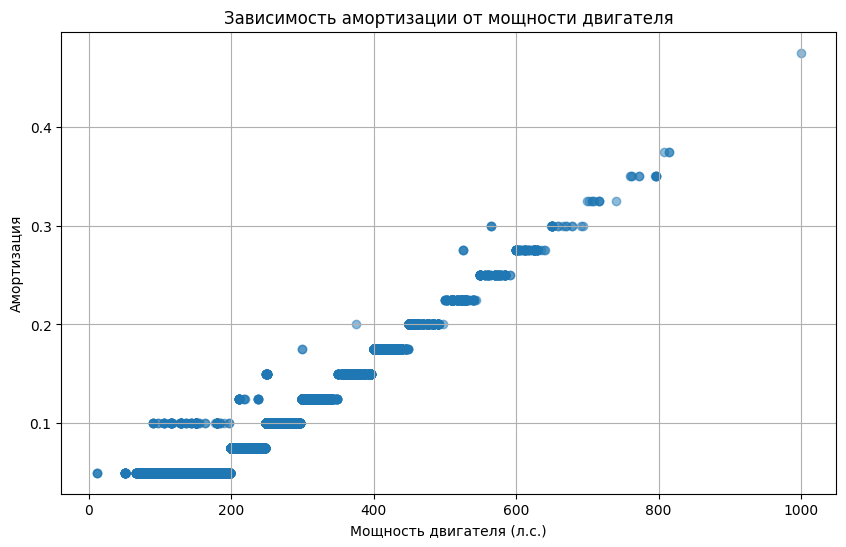

In [ ]:
# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(df['horsepower'], df['depreciation'], alpha=0.5)
plt.title('Зависимость амортизации от мощности двигателя')
plt.xlabel('Мощность двигателя (л.с.)')
plt.ylabel('Амортизация')
plt.grid(True)
plt.show()

# Заполнение пропусков по предсказанной амортизации и тренду

In [ ]:
# Заполнение данных с учетом новой амортизации
df_predicted_depreciation = merged_df.copy()
df_predicted_depreciation = missing_prices_with_depreciation(df_predicted_depreciation)

df_predicted_depreciation.head()

,ID,country,brand,model,horsepower,depreciation,model_effect,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,1,Japan,Acura,MDX,290.0,0.1,0.015948,2300550.0,2502742.0,2722704.0,2961998.0,3225000.0,3505200.0,3808200.0,4148000.0,4517400.0,4910107.0,5341649.0,5811118.0,6321848.0
1,2,Japan,Acura,MDX,290.0,0.1,0.015948,2325496.0,2526475.0,2744823.0,2982042.0,3239500.0,3521000.0,3825500.0,4148000.0,4517400.0,4903544.0,5327328.0,5787738.0,6287937.0
2,3,Japan,Acura,MDX,290.0,0.1,0.015948,1944567.0,2160630.0,2400700.0,2672500.0,2968300.0,3265130.0,3591643.0,3950807.0,4345888.0,4780477.0,5258525.0,5784377.0,6362815.0
3,4,Japan,Acura,MDX,290.0,0.1,0.015948,2081538.0,2312820.0,2569800.0,2855600.0,3166200.0,3482820.0,3831102.0,4214212.0,4635633.0,5099197.0,5609116.0,6170028.0,6787031.0
4,5,Japan,Acura,RDX,277.0,0.1,-0.001568,1643733.0,1826370.0,2029300.0,2197200.0,2454400.0,2699840.0,2969824.0,3266806.0,3593487.0,3952836.0,4348119.0,4782931.0,5261224.0


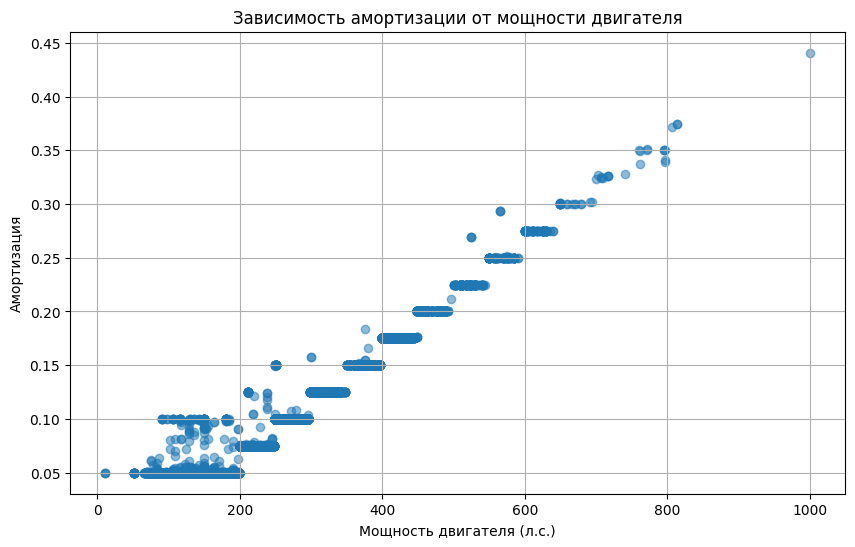

In [ ]:
# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(df_predicted_depreciation['horsepower'], df_predicted_depreciation['depreciation'], alpha=0.5)
plt.title('Зависимость амортизации от мощности двигателя')
plt.xlabel('Мощность двигателя (л.с.)')
plt.ylabel('Амортизация')
plt.grid(True)
plt.show()

# Модель предсказания цены

In [ ]:
# Кодирование категориальных переменных
label_encoder_brand = LabelEncoder()
label_encoder_model = LabelEncoder()

df_predicted_depreciation['brand_encoded'] = label_encoder_brand.fit_transform(df_predicted_depreciation['brand'])
df_predicted_depreciation['model_encoded'] = label_encoder_model.fit_transform(df_predicted_depreciation['model'])

In [ ]:
cols = list(df_predicted_depreciation.columns)
cols.insert(4, cols.pop(cols.index('brand_encoded')))
cols.insert(5, cols.pop(cols.index('model_encoded')))
df_predicted_depreciation = df_predicted_depreciation[cols]
df_predicted_depreciation.head()

,ID,country,brand,model,brand_encoded,model_encoded,horsepower,depreciation,model_effect,2012,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,1,Japan,Acura,MDX,0,384,290.0,0.1,0.015948,2300550.0,...,2961998.0,3225000.0,3505200.0,3808200.0,4148000.0,4517400.0,4910107.0,5341649.0,5811118.0,6321848.0
1,2,Japan,Acura,MDX,0,384,290.0,0.1,0.015948,2325496.0,...,2982042.0,3239500.0,3521000.0,3825500.0,4148000.0,4517400.0,4903544.0,5327328.0,5787738.0,6287937.0
2,3,Japan,Acura,MDX,0,384,290.0,0.1,0.015948,1944567.0,...,2672500.0,2968300.0,3265130.0,3591643.0,3950807.0,4345888.0,4780477.0,5258525.0,5784377.0,6362815.0
3,4,Japan,Acura,MDX,0,384,290.0,0.1,0.015948,2081538.0,...,2855600.0,3166200.0,3482820.0,3831102.0,4214212.0,4635633.0,5099197.0,5609116.0,6170028.0,6787031.0
4,5,Japan,Acura,RDX,0,489,277.0,0.1,-0.001568,1643733.0,...,2197200.0,2454400.0,2699840.0,2969824.0,3266806.0,3593487.0,3952836.0,4348119.0,4782931.0,5261224.0


In [ ]:
# Выбор признаков
features = df_predicted_depreciation.columns[-18:-1] #['brand_encoded', 'model_encoded', 'horsepower', 'depreciation', 'model_effect'] + [str(year) for year in range(2012, 2024)]
X = df_predicted_depreciation[features].copy()
y = df_predicted_depreciation['2024']

# Масштабирование числовых признаков
scaler = StandardScaler()
numerical_features = ['horsepower', 'depreciation', 'model_effect']
X.loc[:, numerical_features] = scaler.fit_transform(X[numerical_features])

# Разделение данных на обучающие и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение CatBoostRegressor model
catboost_model = CatBoostRegressor(verbose=0, random_state=42)
catboost_model.fit(X_train, y_train)

# Обучение RandomForestRegressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predict
catboost_pred = catboost_model.predict(X_test)
random_forest_pred = random_forest_model.predict(X_test)

# Веса предсказаний
catboost_weight = 0.25
rf_weight = 0.75

ensemble_pred = (catboost_weight * catboost_pred + rf_weight * random_forest_pred)

# Оценка модели
mse = mean_squared_error(y_test, ensemble_pred)
rmse = mse ** 0.5

rmse

118988.18568761162

In [ ]:
mse_cat = mean_squared_error(y_test, catboost_pred)
rmse_cat = (mse_cat ** 0.5).round(0)
mse_forest = mean_squared_error(y_test, random_forest_pred)
rmse_forest = (mse_forest ** 0.5).round(0)
rmse_cat, rmse_forest

(241855.0, 134225.0)

In [ ]:
mean_value_2024 = df_predicted_depreciation['2024'].mean()
# Процент отклонения от средний цены
((rmse/mean_value_2024)*100).round(2)

2.01

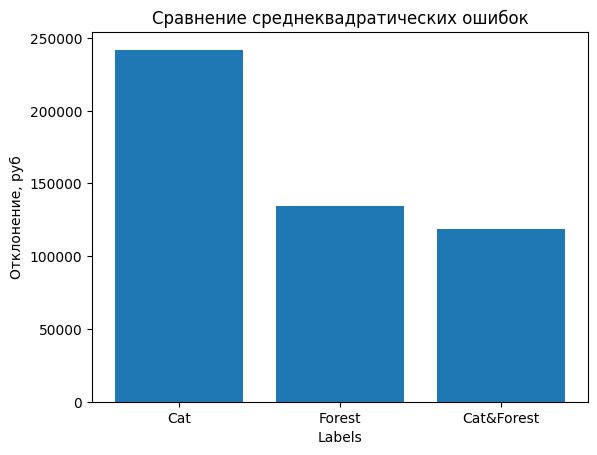

In [ ]:
# Ваши данные
values = [rmse_cat, rmse_forest, rmse]
labels = ['Cat', 'Forest', 'Cat&Forest']

# Создание столбчатого графика
plt.bar(labels, values)

# Добавление заголовка и меток осей
plt.title('Сравнение среднеквадратических ошибок')
plt.xlabel('Labels')
plt.ylabel('Отклонение, руб')

# Показать график
plt.show()

# Предсказание цен для 2025 года

In [ ]:
df_forest = df_predicted_depreciation.copy()
df_forest = df_forest.drop(columns=['2012'])
# Переименовать столбцы с годами на год меньше(RanfdomFarestRegressor по-другому не воспринимает)
# Словарь для переименования
rename_dict = {str(year): str(year - 1) for year in range(2013, 2025)}
df_forest = df_forest.rename(columns=rename_dict)

# Добавить пустой столбец "2024"(2025)
df_forest['2024'] = np.nan
df_forest.head()

,ID,country,brand,model,brand_encoded,model_encoded,horsepower,depreciation,model_effect,2012,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,1,Japan,Acura,MDX,0,384,290.0,0.1,0.015948,2502742.0,...,3225000.0,3505200.0,3808200.0,4148000.0,4517400.0,4910107.0,5341649.0,5811118.0,6321848.0,NaN
1,2,Japan,Acura,MDX,0,384,290.0,0.1,0.015948,2526475.0,...,3239500.0,3521000.0,3825500.0,4148000.0,4517400.0,4903544.0,5327328.0,5787738.0,6287937.0,NaN
2,3,Japan,Acura,MDX,0,384,290.0,0.1,0.015948,2160630.0,...,2968300.0,3265130.0,3591643.0,3950807.0,4345888.0,4780477.0,5258525.0,5784377.0,6362815.0,NaN
3,4,Japan,Acura,MDX,0,384,290.0,0.1,0.015948,2312820.0,...,3166200.0,3482820.0,3831102.0,4214212.0,4635633.0,5099197.0,5609116.0,6170028.0,6787031.0,NaN
4,5,Japan,Acura,RDX,0,489,277.0,0.1,-0.001568,1826370.0,...,2454400.0,2699840.0,2969824.0,3266806.0,3593487.0,3952836.0,4348119.0,4782931.0,5261224.0,NaN


In [ ]:
# Предсказание для 2025 года
df_predicted_2025 = df_predicted_depreciation.copy()
# Выбор признаков
features_forest = ['brand_encoded', 'model_encoded', 'horsepower', 'depreciation', 'model_effect'] + [str(year) for year in range(2012, 2024)]
features_cat = ['brand_encoded', 'model_encoded', 'horsepower', 'depreciation', 'model_effect'] + [str(year) for year in range(2012, 2025)]
X_cat = df_predicted_depreciation[features_cat].copy()
X_forest = df_forest[features_forest].copy()
# Predict
catboost_pred = catboost_model.predict(X_cat)
random_forest_pred = random_forest_model.predict(X_forest)

# Среднее значение предикта
catboost_weight = 0.35
rf_weight = 0.65

ensemble_pred = (catboost_weight * catboost_pred + rf_weight * random_forest_pred).round(0)
df_predicted_2025['2025'] = ensemble_pred

In [ ]:
df_predicted_depreciation.head()

,ID,country,brand,model,brand_encoded,model_encoded,horsepower,depreciation,model_effect,2012,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,1,Japan,Acura,MDX,0,384,290.0,0.1,0.015948,2300550.0,...,2961998.0,3225000.0,3505200.0,3808200.0,4148000.0,4517400.0,4910107.0,5341649.0,5811118.0,6321848.0
1,2,Japan,Acura,MDX,0,384,290.0,0.1,0.015948,2325496.0,...,2982042.0,3239500.0,3521000.0,3825500.0,4148000.0,4517400.0,4903544.0,5327328.0,5787738.0,6287937.0
2,3,Japan,Acura,MDX,0,384,290.0,0.1,0.015948,1944567.0,...,2672500.0,2968300.0,3265130.0,3591643.0,3950807.0,4345888.0,4780477.0,5258525.0,5784377.0,6362815.0
3,4,Japan,Acura,MDX,0,384,290.0,0.1,0.015948,2081538.0,...,2855600.0,3166200.0,3482820.0,3831102.0,4214212.0,4635633.0,5099197.0,5609116.0,6170028.0,6787031.0
4,5,Japan,Acura,RDX,0,489,277.0,0.1,-0.001568,1643733.0,...,2197200.0,2454400.0,2699840.0,2969824.0,3266806.0,3593487.0,3952836.0,4348119.0,4782931.0,5261224.0


# Заполнение пропусков в исходном файле моделью

In [ ]:
df = df.drop('depreciation', axis=1)

In [ ]:
# Подготовка датафрейма для конечного результата

df_effect = df_predicted_depreciation[['ID', 'depreciation', 'model_effect']]
final_df = df.merge(df_effect, on='ID')
cols = list(final_df.columns)
cols.insert(5, cols.pop(cols.index('depreciation')))
cols.insert(6, cols.pop(cols.index('model_effect')))
final_df = final_df[cols]
df_2025 =df_predicted_2025[['ID', '2025']]
final_df = final_df.merge(df_2025, on='ID')
final_df.head()

,ID,country,brand,model,horsepower,depreciation,model_effect,2012,2013,2014,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,1,Japan,Acura,MDX,290.0,0.1,0.015948,NaN,NaN,NaN,...,3225000.0,3505200.0,3808200.0,4148000.0,4517400.0,NaN,NaN,NaN,NaN,6712534.0
1,2,Japan,Acura,MDX,290.0,0.1,0.015948,NaN,NaN,NaN,...,3239500.0,3521000.0,3825500.0,4148000.0,4517400.0,NaN,NaN,NaN,NaN,6664734.0
2,3,Japan,Acura,MDX,290.0,0.1,0.015948,NaN,NaN,2400700.0,...,2968300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6867145.0
3,4,Japan,Acura,MDX,290.0,0.1,0.015948,NaN,NaN,2569800.0,...,3166200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7292859.0
4,5,Japan,Acura,RDX,277.0,0.1,-0.001568,NaN,NaN,2029300.0,...,2454400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5684240.0


In [ ]:
# Подготовка данных для обучения модели
years = [str(year) for year in range(2012, 2025)]
static_features = ['brand_encoded', 'model_encoded', 'horsepower', 'depreciation', 'model_effect']

# Обучение моделей для каждого года и создание датафрейма для предсказанных значений
predicted_values = df.copy()

for year in years:
    df_year_predict = df_predicted_depreciation.copy()
    y_full = df_year_predict[year]
    features = static_features + [y for y in years if y != year]
    X_full = df_predicted_depreciation[features].copy()

    # Обучение моделей на всех данных
    catboost_model = CatBoostRegressor(verbose=0, random_state=42)
    catboost_model.fit(X_full, y_full)

    random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
    random_forest_model.fit(X_full, y_full)

    # Предсказание пропущенных значений для текущего года
    X_missing = df_year_predict[features]
    catboost_pred = catboost_model.predict(X_missing)
    random_forest_pred = random_forest_model.predict(X_missing)

    # Среднее значение предикта
    catboost_weight = 0.25
    rf_weight = 0.75
    ensemble_pred = (catboost_weight * catboost_pred + rf_weight * random_forest_pred).round(1) # 1 знак, чтоб отличить в экселе предсказанные от исходных

    # Заполнение предсказанного датафрейма
    predicted_values[year] = ensemble_pred
predicted_values.head()

,ID,country,brand,model,horsepower,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,1,Japan,Acura,MDX,290.0,2292573.5,2497833.0,2720617.4,2964299.6,3227484.6,3501706.0,3813323.6,4156615.5,4504170.3,4921693.4,5349536.8,5824459.5,6316216.5
1,2,Japan,Acura,MDX,290.0,2325876.9,2526033.1,2747769.3,2981950.0,3239902.0,3524976.5,3823549.1,4160154.8,4507267.2,4912086.9,5328076.8,5779081.4,6290394.9
2,3,Japan,Acura,MDX,290.0,1942802.3,2158448.6,2406344.4,2664758.7,2958579.5,3261784.8,3593714.5,3953168.8,4350094.3,4789064.3,5262217.7,5783692.5,6378389.6
3,4,Japan,Acura,MDX,290.0,2083988.1,2312696.4,2569714.9,2860143.5,3160567.9,3490000.1,3843374.5,4231671.4,4657169.3,5120470.2,5629592.7,6155514.6,6777199.0
4,5,Japan,Acura,RDX,277.0,1646168.2,1825508.7,2022432.7,2215104.6,2448161.6,2709684.3,2966792.8,3265597.1,3594896.1,3949674.8,4336556.0,4774434.2,5269753.4


In [ ]:
years = [str(year) for year in range(2012, 2025)]
# Заполняем пропущенные значения в final_df значениями из predicted_values
for year in years:
    final_df[year] = final_df[year].fillna(predicted_values[year])

In [ ]:
final_df.head()

,ID,country,brand,model,horsepower,depreciation,model_effect,2012,2013,2014,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,1,Japan,Acura,MDX,290.0,0.1,0.015948,2288625.7,2496301.1,2718614.9,...,3225000.0,3505200.0,3808200.0,4148000.0,4517400.0,4925326.4,5352901.7,5829821.3,6316223.5,6712534.0
1,2,Japan,Acura,MDX,290.0,0.1,0.015948,2326549.6,2525787.3,2748603.1,...,3239500.0,3521000.0,3825500.0,4148000.0,4517400.0,4915125.1,5328473.9,5776243.4,6291531.1,6664734.0
2,3,Japan,Acura,MDX,290.0,0.1,0.015948,1942011.8,2157874.3,2400700.0,...,2968300.0,3261200.2,3594303.7,3954283.5,4352299.3,4792932.1,5262415.5,5783489.6,6385580.1,6867145.0
3,4,Japan,Acura,MDX,290.0,0.1,0.015948,2085042.7,2312971.1,2569800.0,...,3166200.0,3492514.8,3843622.9,4238016.7,4666569.4,5127670.7,5638423.9,6150273.2,6772803.4,7292859.0
4,5,Japan,Acura,RDX,277.0,0.1,-0.001568,1646436.9,1824304.9,2029300.0,...,2454400.0,2706573.4,2963105.8,3267071.6,3595228.6,3947557.7,4332858.8,4770629.5,5274098.0,5684240.0


In [ ]:
final_df.to_excel('/content/drive/MyDrive/Absolut_final_file_dreamteam.xlsx')